In [1]:
import sys,os
import torch
sys.path.append('../')
from rdkit import DataStructs, Chem
from rdkit.Chem import MACCSkeys, Draw
from fast_jtnn import *
import pandas as pd

Duplicate key in file PosixPath('/home/nickyang69/anaconda3/envs/chem/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc'), line 417 ('axes.linewidth: 3')
Duplicate key in file PosixPath('/home/nickyang69/anaconda3/envs/chem/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc'), line 494 ('xtick.labelsize: 16')
Duplicate key in file PosixPath('/home/nickyang69/anaconda3/envs/chem/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc'), line 495 ('ytick.labelsize: 16')
Duplicate key in file PosixPath('/home/nickyang69/anaconda3/envs/chem/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc'), line 496 ('xtick.major.size: 10')
Duplicate key in file PosixPath('/home/nickyang69/anaconda3/envs/chem/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc'), line 497 ('xtick.major.width: 3')
Duplicate key in file PosixPath('/home/nickyang69/anaconda3/envs/chem/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc'), line 498 ('ytick.major.size: 10

Load Model

In [2]:
generator = LigandGenerator()

/home/nickyang69/.local/lib/python3.6/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Random Sampling

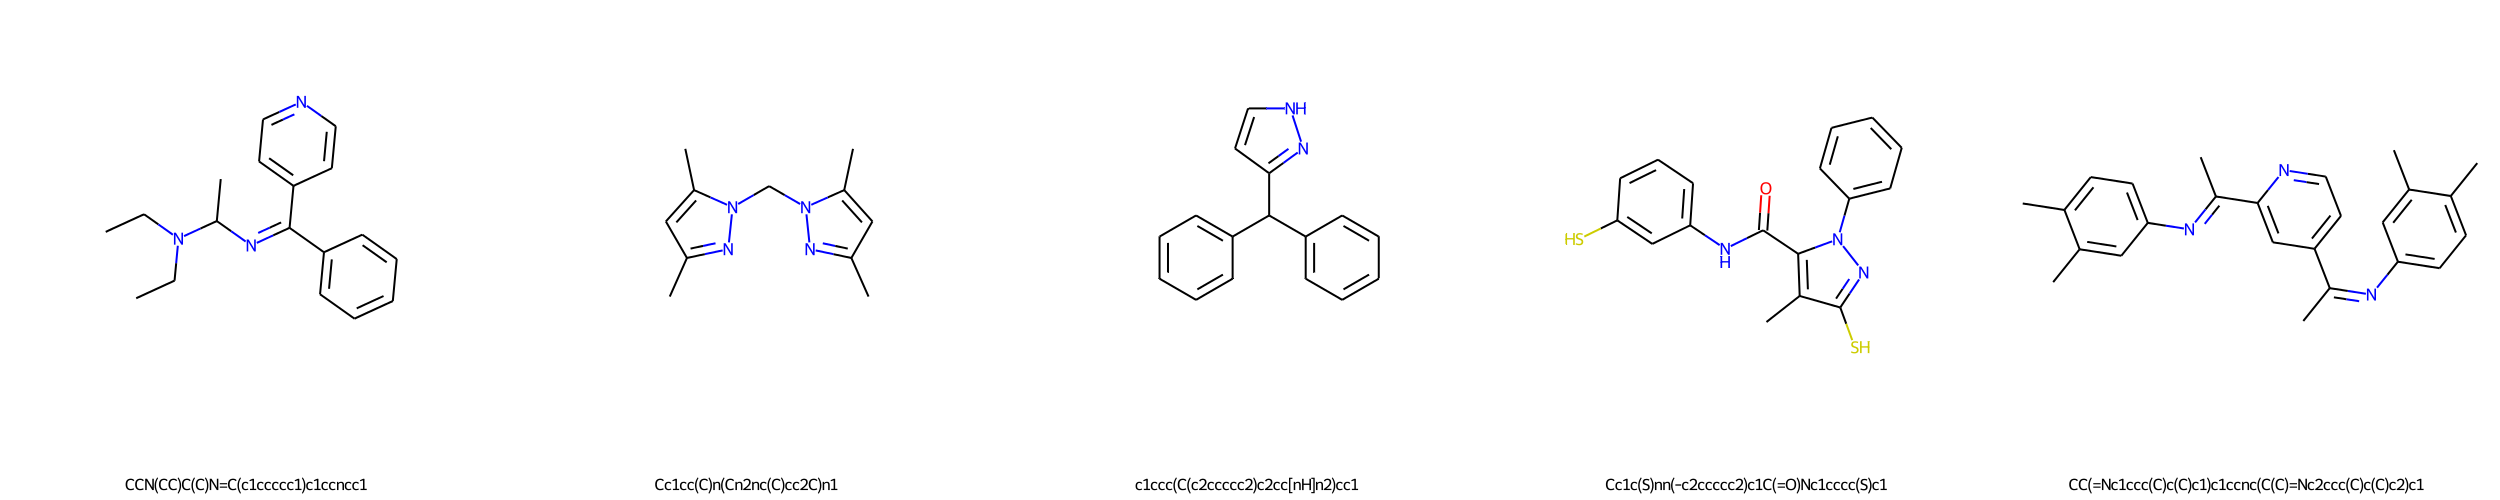

In [3]:
numsmiles = 5
smiles = generator.randomgen(numsmiles)
if numsmiles >= 5:
    img = Draw.MolsToGridImage([Chem.MolFromSmiles(mol) for mol in smiles], molsPerRow=5,subImgSize=(500,500), legends=smiles)
else:
    img = Draw.MolsToGridImage([Chem.MolFromSmiles(mol) for mol in smiles], molsPerRow=numsmiles,subImgSize=(500,500), legends=smiles)

img

Sampling from Target (without LFS)

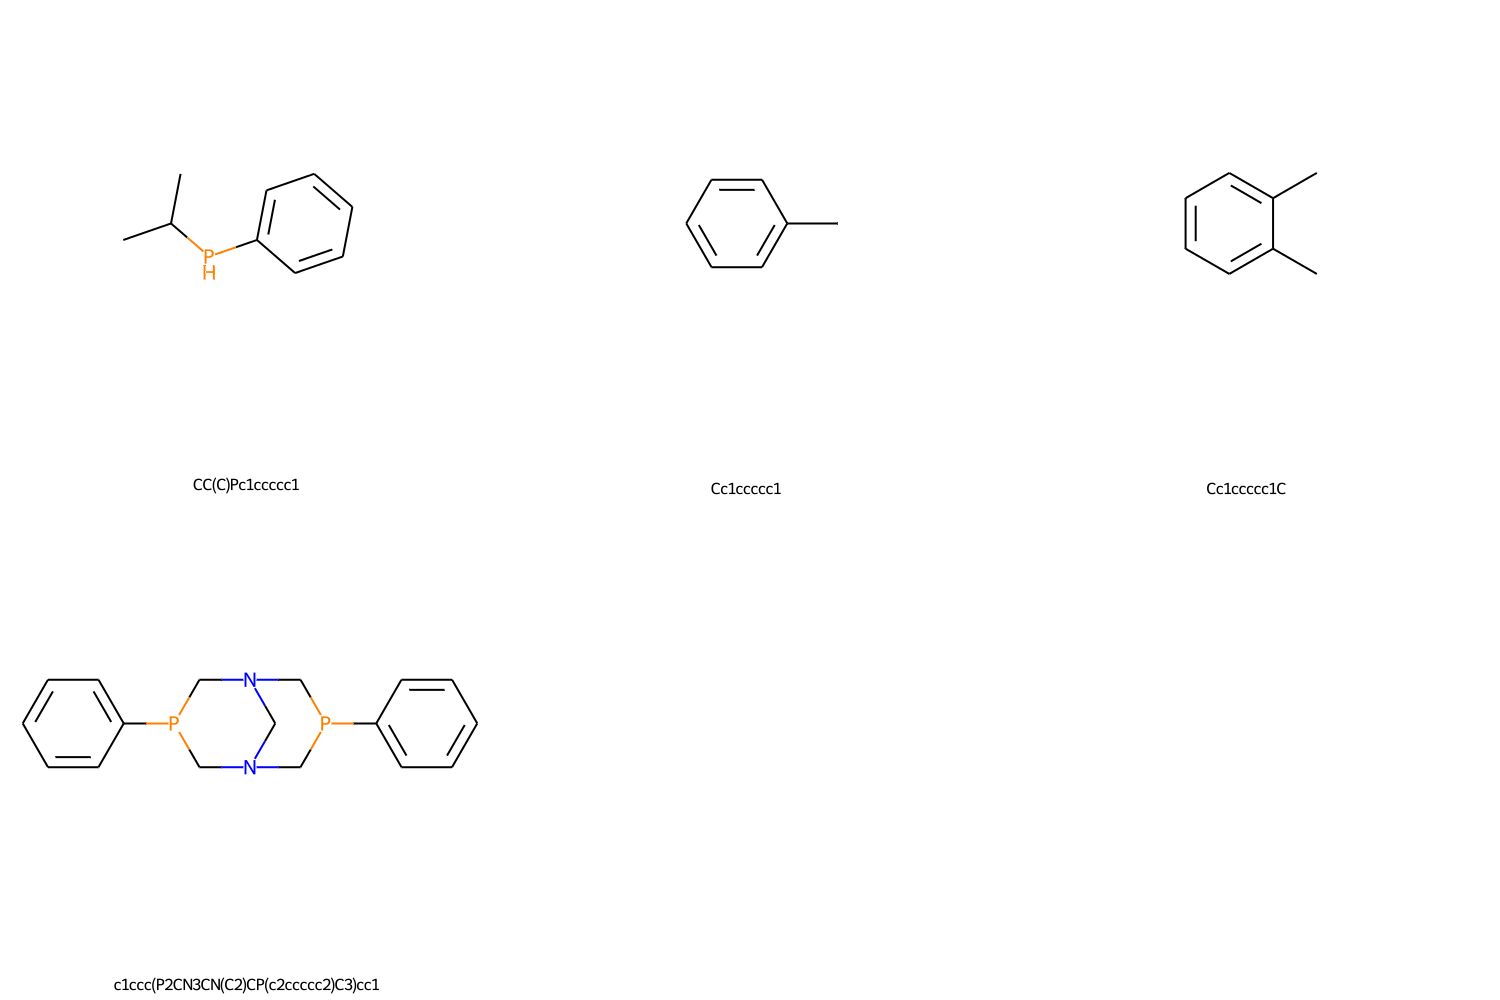

In [4]:
target_smile = 'c1ccccc1'
numsmiles = 3
step_size = 0.01
smiles = generator.gen_from_target_withoutprop(target_smile,numsmiles)
if numsmiles >= 5:
    img = Draw.MolsToGridImage([Chem.MolFromSmiles(mol) for mol in smiles], molsPerRow=5,subImgSize=(500,500), legends=smiles)
else:
    img = Draw.MolsToGridImage([Chem.MolFromSmiles(mol) for mol in smiles], molsPerRow=numsmiles,subImgSize=(500,500), legends=smiles)

img


Optimization Target(with LFS)

In [3]:
smile = 'C#N'
lfs_target = 0.3
target_generator = generator.LFS_optimization(lfs_target,smile)
for smi,z_values in target_generator:
    generator.scatter_plot(z_values,smi)

Optimizaiotn Start
Ploss is 0.2761996194720268.
tensor([[ 0.0061, -0.0051,  0.0084, -0.0181, -0.0111,  0.0038,  0.0019, -0.0036,
         -0.0900, -0.0042,  0.0028,  0.0031,  0.0027, -0.0032, -0.0180, -0.0023,
         -0.0052,  0.0083, -0.0027, -0.0037, -0.0275,  0.0071,  0.0089, -0.0041,
          0.0032, -0.0074,  0.0044, -0.0027]], grad_fn=<MulBackward0>)
Ploss is 0.2707511719316244.
tensor([[ 0.0097, -0.0117,  0.0071, -0.0033, -0.0054,  0.0156,  0.0310, -0.0164,
         -0.0007, -0.0140,  0.0212,  0.0190,  0.0216, -0.0187, -0.0033, -0.0258,
         -0.0115,  0.0071, -0.0224, -0.0159, -0.0022,  0.0084,  0.0067, -0.0146,
          0.0185, -0.0081,  0.0136, -0.0218]], grad_fn=<MulBackward0>)
Ploss is 0.26692584082484244.
tensor([[ 0.0035, -0.0029,  0.0048, -0.0103, -0.0063,  0.0022,  0.0011, -0.0021,
         -0.0513, -0.0024,  0.0016,  0.0018,  0.0016, -0.0018, -0.0103, -0.0013,
         -0.0029,  0.0047, -0.0015, -0.0021, -0.0157,  0.0040,  0.0051, -0.0023,
          0.0018, -0.0

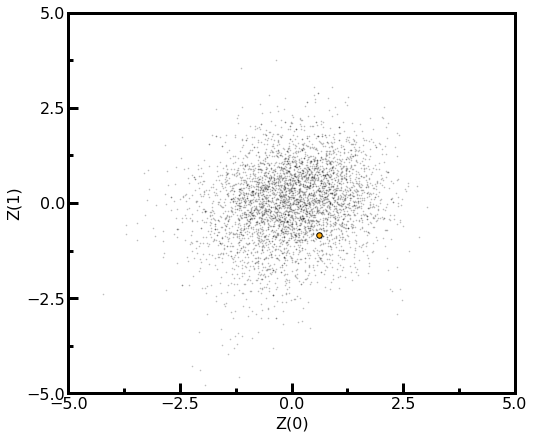

In [6]:
from matplotlib import pyplot as plt, ticker
xmin, xmax = -5, 5
ymin, ymax = -5, 5
xmajor, xminor = 2.5, 1.25
ymajor, yminor = 2.5, 1.25
df = pd.DataFrame(z_values)
train_data = generator.scaler.transform(df)
fig, ax = plt.subplots(figsize=(8, 7))
dim1 = 0
dim2 = 1
xlabel = 'Z(%s)' % dim1
ylabel = 'Z(%s)' % dim2

ax.xaxis.set_major_locator(ticker.MultipleLocator(xmajor))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(xminor))
ax.yaxis.set_major_locator(ticker.MultipleLocator(ymajor))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(yminor))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_xlabel(xlabel, fontsize=16)
ax.set_ylabel(ylabel, fontsize=16)

ax.scatter(generator.x_train, generator.y_train, c='black', s=0.5, edgecolors='black', alpha=0.2)
ax.scatter(train_data[0][dim1],train_data[0][dim2],c='orange', s=30, edgecolors='black', alpha=1)


In [11]:
img.save(img_filepath)

AttributeError: 'Image' object has no attribute 'save'